In [1]:
import matplotlib.pyplot as plt
import numpy as np
from load_data import load_directory, train_gen, val_gen
from PIL import Image
import random
import Augmentor
from skimage.transform import SimilarityTransform, AffineTransform, ProjectiveTransform, warp, rotate
import math

/home/alliedtoasters/miniconda3/envs/dev1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
batch_size = 20
directory = './images_evaluation/Atemayar_Qelisayer/'
train, test, labels = load_directory(directory)
tg = train_gen(train, labels, batch_size=batch_size, augmentation=False)
path = './train/'
sample_image = Image.open(path + train.sample().file.values[0])

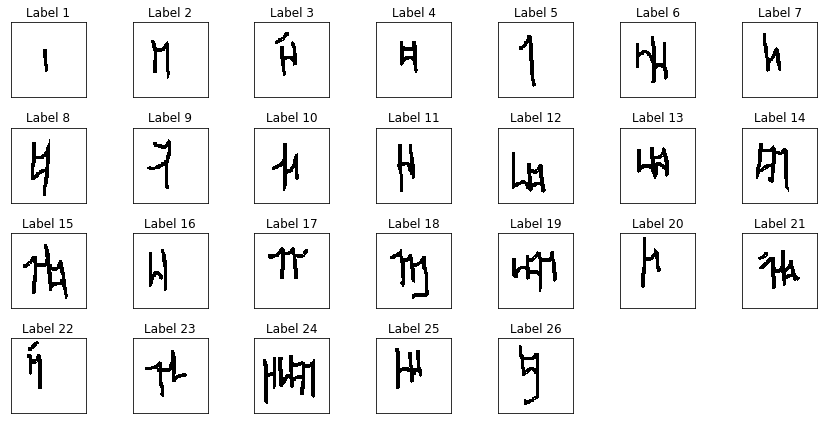

In [3]:
def plot_training_characters(train):
    """Plots the training characters for presentation"""
    path = './train/'
    images = train.iterrows()
    n_rows = len(train)//7 + 1
    fig, ax = plt.subplots(n_rows, 7, figsize=(12, n_rows*1.5));
    for i, row in enumerate(ax):
        for j, column in enumerate(row):
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
            try:
                k, next_character = next(images)
            except:
                ax[i, j].set_visible(False)
            label = next_character.label
            file = next_character.file
            img = np.array(Image.open(path + file))
            ax[i, j].set_title('Label {}'.format(label+1))
            ax[i, j].imshow(img, cmap = 'Greys_r')
    plt.tight_layout()
    plt.show();
    return

plot_training_characters(train)

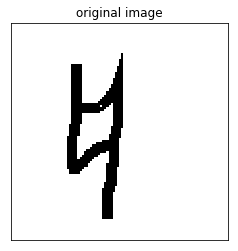

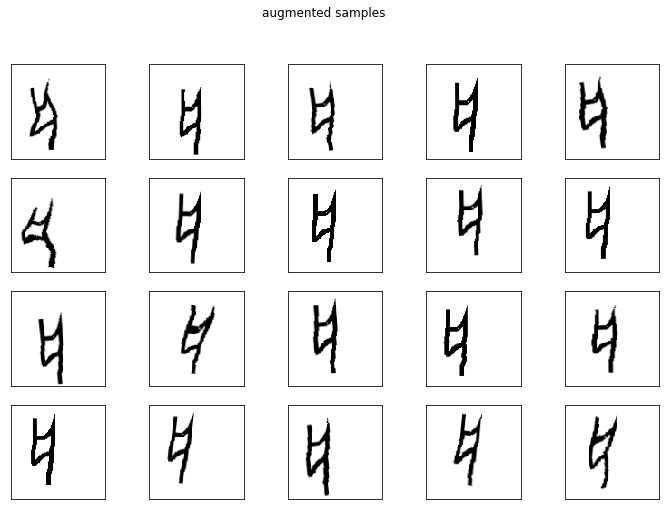

In [6]:
def trapezoid_shift(image, magnitude):
    mag = magnitude // 2
    a = random.randint(-mag, mag)
    b = random.randint(-mag, mag)
    c = random.randint(-mag, mag)
    d = random.randint(-mag, mag)
    src = np.array([[0, 0], [0, 105], [105, 105], [105, 0]])
    dst = np.array([[0 + a, 0 + b], [0 + c, 105 - b], [105 - c, 105 + d], [105 - a, 0 - d]])

    proj_tform = ProjectiveTransform()
    proj_tform.estimate(src, dst)
    warped = warp(image, proj_tform, output_shape=(105, 105), mode='edge')
    return warped

def distort(image, magnitude=0):
    """Uses PIL, so must be PIL object."""
    a = max(0, magnitude-4)
    distortion = random.randint(0, a)
    dstrt = Augmentor.Operations.Distort(1, 4, 4, distortion)
    res = dstrt.perform_operation([image])
    return res[0]
    
def rotate_transform(image, magnitude):
    """Applies rotation transform."""
    a = magnitude
    rot = random.randint(-a, a)
    arr = rotate(image, angle=rot, mode='edge')
    return arr
    
def nudge_transform(image, magnitude):
    """Nudges image by some number of pixels."""
    a = min(8, (magnitude + 2))
    tx = random.randint(-a, a)
    ty = random.randint(-a, a)
    tform = SimilarityTransform(translation=(ty, tx))
    arr = warp(image, tform, mode='edge')
    return arr

def augment(img, loss=2):
    """applies a series of augmentations to 
    input image and returns.
    """
    max_magnitude = int(max(1.5 - loss, 0) * 10)
    if max_magnitude == 0:
        magnitude = 0
    else:
        magnitude = random.randint(0, max_magnitude)
    img = distort(img, magnitude)
    #convert to array for these transforms.
    arr = np.array(img)
    arr = rotate_transform(arr, magnitude)
    arr = nudge_transform(arr, magnitude)
    arr = trapezoid_shift(arr, magnitude)
    return arr

def show_augmentation(img, loss=0):
    orig = img
    plt.title('original image');
    plt.imshow(orig, cmap='Greys_r');
    cur_axes = plt.gca()
    cur_axes.axes.get_xaxis().set_ticks([])
    cur_axes.axes.get_yaxis().set_ticks([])
    fig, ax = plt.subplots(4, 5, figsize=(12, 8));
    fig.suptitle('augmented samples')
    for i in range(4):
        for j in range(5):
            ax[i, j].imshow(augment(img, loss=loss), cmap='Greys_r');
            ax[i, j].set_xticks([])
            ax[i, j].set_yticks([])
    plt.show();    

show_augmentation(sample_image)

In [5]:
tform = SimilarityTransform(rotation=)
img = warp(sample_image, tform)
plt.imshow(img)

SyntaxError: invalid syntax (<ipython-input-5-257cb5ba972a>, line 1)

In [ ]:
int(max(1-.483, 0) * 10)

In [ ]:
arr = np.array(sample_image)